# PRACTICA GUIADA: Introducción a Machine Learning 1

Ahora revisaremos varios ejemplos simples de aplicación de métodos de aprendizaje supervisado y no supervisado

### Ejemplo de aprendizaje supervisado: Regresión lineal simple

Como ejemplo de este proceso, vamos a considerar una regresión lineal simple, es decir, el caso común de ajustar una línea a datos de la forma $(x, y)$.

Vamos a generar el siguiente dataset para nuestro ejemplo de regresión:

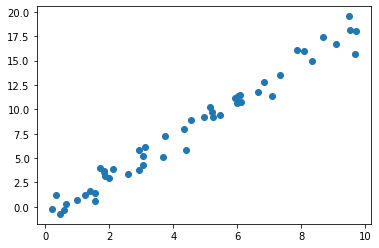

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# Ploteamos
plt.scatter(x, y);

Una vez generados los datos, podemos usar la receta estudiada anteriormente. Vamos a recorrer los pasos del proceso: 

#### 1. Seleccionar una "clase de modelo"

En Scikit-Learn, cada clase de modelo se representa con una clase de Python. 

Entonces, por ejemplo, si queremos computar un modelo de regresión lineal simple, podemos importar la clase de regresión lineal de esta forma:

In [2]:
from sklearn.linear_model import LinearRegression

Notar que también existen otros modelos de regresión lineal más generales; Podés leer más acerca de ellos en la [documentación ``sklearn.linear_model``](http://Scikit-Learn.org/stable/modules/linear_model.html). 

#### 2. Elegir los hiperparámetros del modelo

Es importante destacar que *una clase de modelo no es lo mismo que una instancia de modelo*.

Una vez que hemos decidido nuestra clase de modelo, todavía tenemos que tomar algunas decisiones. Dependiendo de la clase de modelo con la que trabajemos, podríamos tener que responder a una o más preguntas como las siguientes:

- ¿Queremos ajustar también un intercepto (intercept = True)?
- ¿Queremos que el modelo esté normalizado?
- ¿Queremos agregar features calculados a partir del input para darle mayor flexibilidad al modelo?
- ¿Qué grado de "regularización" vamos a querer usar en el modelo?

Estos son ejemplos de las importantes decisiones que deben hacerse **una vez que hemos seleccionado la clase de modelo a usar**.

Estas elecciones se representan frecuentemente como *hiperparámetros*, o parámetros que deben ser seteados antes de que el modelo sea ajustado a los datos. 

En Scikit-Learn, los hiperparámetros son elegidos como argumentos en la instanciación del modelo. Exploraremos cómo podemos justificar cuantitativamente la elección de hiperparámetros en las próximas clases.  

Para nuestro ejemplo de regresión lineal, podemos instanciar la clase ``LinearRegression`` y especificar que nos gustaría ajustar el intercepto usando el hiperparámetro ``fit_intercept``: 

In [3]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Tener en cuenta**: cuando el modelo es instanciado, la única acción que sucede es almacenar los valores de estos valores de hiperparámetros.

En particular, todavía no hemos aplicado el modelo a ningún dato: la API de Scikit-Learn hace una distinción muy clara entre la *elección del modelo con sus hiperparámetros* y la *aplicación del modelo a los datos*. 

#### 3. Preparar los datos en una matriz de features y un vector de target

Previamente hemos hablado de la representación de datos de Scikit-Learn, la cual requiere una matriz de features de dos dimensiones y un vector target de una dimensión.

Aquí nuestra variable target ``y`` ya se encuentra en un formato correcto (un array de longitud ``n_samples``), pero necesitamos procesar los datos en ``x`` para convertirlos en una matriz de tamaño ``[n_samples, n_features]``.

En este caso, esto se reduce a un simple cambio de forma (reshaping) del array de una dimensión: 

In [4]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [5]:
x.shape

(50,)

In [6]:
#X = x[:, np.newaxis]
#X.shape

# Otra forma de hacerlo
X = x.reshape(-1,1)

In [7]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

#### 4. Ajustar el modelo a los datos

Ahora es momento de aplicar nuestro modelo a los datos.
Esto puede hacerse con el método ``fit()`` de nuestra instancia de modelo.

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

El método ``fit()`` realiza una secuencia de cómputos internos dependientes del modelo, y los resultados de estas operaciones son almacenadas en atributos específicos de la clase de modelo que el usuario luego puede explorar.

En Scikit-learn, por convención, todos los atributos que representan los parámetros de los modelos que fueron aprendidos durante el procesos de entrenamiento con ``fit()``, tienen `underscores` en sus nombres; por ejemplo en este modelo lineal, podemos observar el parámetro coef_ y el parámetro intercept_:

In [9]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

-0.9033107255311164

Estos dos parámetros representan la pendiente y el intercepto del ajuste lineal simple a los datos. 
Comparándolos con la definición del dataset sintético creado al principio del ejemplo, podemos ver que están muy cerca de la pendiente 2 y el intercepto -1 definidos en la fórmula para generar los datos.

Una pregunta que surge frecuentemente se relaciona con incertidumbre o incerteza (uncertainty) en estos parámetros internos del modelo. 

En general, Scikit-Learn no provee herramientas para obtener conclusiones del estado interno de los modelos: interpretar los parámetros de un modelo tiene mucho más que ver con una pregunta de *modelado estadístico* más que una pregunta de *machine learning*.

Machine learning en cambio se enfoca en la calidad con la cual el modelo *predice*.

Si te interesa investigar el significado de los parámetros de ajuste dentro del modelo, existen otras herramientas, incluyendo el paquete de python [Statsmodels](http://statsmodels.sourceforge.net/).

#### 5. Predecir etiquetas para datos desconocidos

Una vez que el modelo es entrenado, la principal tarea en el aprendizaje supervisado es evaluarlo en base a lo que dice acerca de nuevos datos que no fueron parte del **set de entrenamiento**. 

En Scikit-Learn, esto puede hacerse usando el método ``predict()``. 
En el contexto de este ejemplo, nuestro "nuevo dataset" será un vector de valores *x*, y observaremos los valores *y* que el modelo predice.

In [11]:
xfit = np.linspace(-1, 11)

In [12]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

Como antes, necesitamos manipular estos valores *x* en una matriz de features de tamaño ``[n_samples, m_features]``, y recién despueś de este paso podremos utilizarla como argumento para la predicción. 

In [13]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finalmente, vamos a visualizar los resultados ploteando primero los datos originales, y luego el ajuste de nuestro modelo lineal:

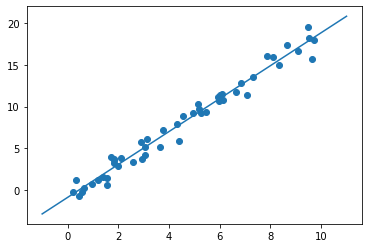

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Típicamente, la eficacia del modelo es evaluada comparando sus resultados con algún baseline conocido, como veremos en el próximo ejemplo.

### Ejemplo de aprendizaje supervisado: Clasificación con el dataset Iris

Veamos otro ejemplo de este proceso, usando el dataset Iris del que hablamos previamente. 
Nuestra pregunta será esta: dado un modelo entrenado en una porción del del dataset Iris, cuán bien podemos predecir las etiquetas restantes?.

In [15]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(52)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [16]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [17]:
y_iris = iris['species']
y_iris.shape

(150,)

Para esta tarea, usaremos un modelo generativo extremadamente simple conocido como Naive Bayes Gausiano, el cuál procede asumiendo que cada clase se construye a partir de una distribución Gausiana. Lo veremos en detalle más adelante en el curso.

Porque es muy rápido y no tiene hiperparámetros para elegir, Naive Bayes Gausiano es frecuentemente un buen modelo para usar como una clasificación baseline, antes de explorar si pueden encontrarse mejoras a través de modelos más sofisticados.

Nos gustaría evaluar el modelo en datos que no hayan sido usados en el entrenamiento, por lo tanto vamos a dividir los datos en un *training set* y un *testing set*.

Esto podría hacerse a mano, pero es más conveniente usar la función ``train_test_split``.

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

Con los datos preparados, podemos seguir nuestra receta para predecir las etiquetas:

In [19]:
from sklearn.naive_bayes import GaussianNB # 1. elegir la clase de modelo
model = GaussianNB()                       # 2. instanciar el modelo
model.fit(Xtrain, ytrain)                  # 3. ajustar el modelo a los datos
y_model = model.predict(Xtest)             # 4. predecir a partir de nuevos datos

Finalmente, podemos usar la función ``accuracy_score`` para estudiar la proporción de etiquetas predichas que coinciden con el valor de verdad correspondiente a esa observación.

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Con un accuracy que supera el 97%, podemos ver que incluso este sencillo algoritmo de clasificación es efectivo para este dataset particular.

### Ejemplo de aprendizaje no supervisado: Dimensionalidad de Iris

Como un ejemplo de un problema de aprendizaje no supervisado, veamos cómo reducir la dimensionalidad de los datos de Iris para poder visualizarlos más fácilmente. 

Recordemos que el dataset Iris es cuatridimensional: hay cuatro features medidas para cada observación (sample).

La tarea de reducción de la dimensionalidad es investigar si hay una representación apropiada de baja dimensionalidad que retiene las características esenciales del dataset original. 

Frecuentemente la reducción de la dimensionalidad se usa como una ayuda para visualizar datos: después de todo es mucho más fácil plotear datos en dos dimensiones que en cuatro o más dimensiones. 

En este ejemplo vamos a usar Principal Component Analysis (PCA), que es una técnica rápida de reducción lineal de la dimensionalidad. 
Vamos a pedirle al modelo que devuelva dos componentes, es decir, una representación bidimensional de los datos. 

Siguiendo la secuencia de pasos presentada previamente, tenemos:

In [23]:
# 1. Seleccionar la clase de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar el modelo con hiperparámetros
model = PCA(n_components=2)            

# 3. Ajustar a los datos. Notar que no especificamos "y" 
model.fit(X_iris)                      

# 4. Transformar los datos a dos dimensiones
X_2D = model.transform(X_iris)         

Ahora vamos a plotear los resultados. Una forma rápida de hacer esto es insertar los resultados en el ``DataFrame`` original de Iris, y usar el método ``lmplot`` de Seaborn para mostrar los resultados:


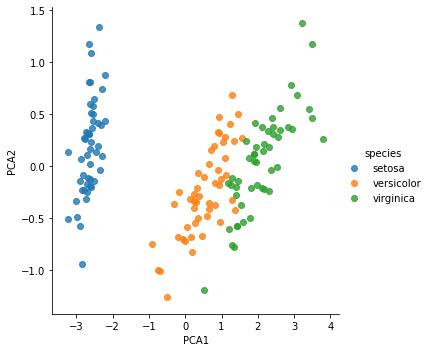

In [24]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Vemos que en la representación en dos dimensiones, las especies están relativamente bien separadas, incluso aunque el algoritmo PCA no tenía conocimiento de las etiquetas de las especies de flores! 

Esto nos indica que una clasificación relativamente sencilla debería probablemente ser efectiva con este dataset, como vimos antes. 

### Aprendizaje no supervisado: Clustering con Iris

Vamos a aplicar un algoritmo de clustering al dataset Iris.

Un algoritmo de clustering intenta encontrar grupos distintos sin tener referencias a etiquetas en los datos. 

Vamos a usar un método poderoso de clustering llamado Gaussian mixture model (GMM). 
Un GMM intenta modelar los datos como una colección de blobs Gausianos. 

Podemos ajustar el GMM de la siguiente forma:

In [25]:
# 1. Elegimos la clase de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos el modelo con sus hiperparámetros
model = GaussianMixture(n_components=3,
            covariance_type='full')  

# 3. Ajustamos a los datos. Notar que "y" no es especificada
model.fit(X_iris)                    

# 4. Determinamos las etiquetas de los clusters
y_gmm = model.predict(X_iris)       

Como antes, agregaremos las etiquetas de los clusters al ``DataFrame`` Iris y usaremos Seaborn para plotear los resultados:

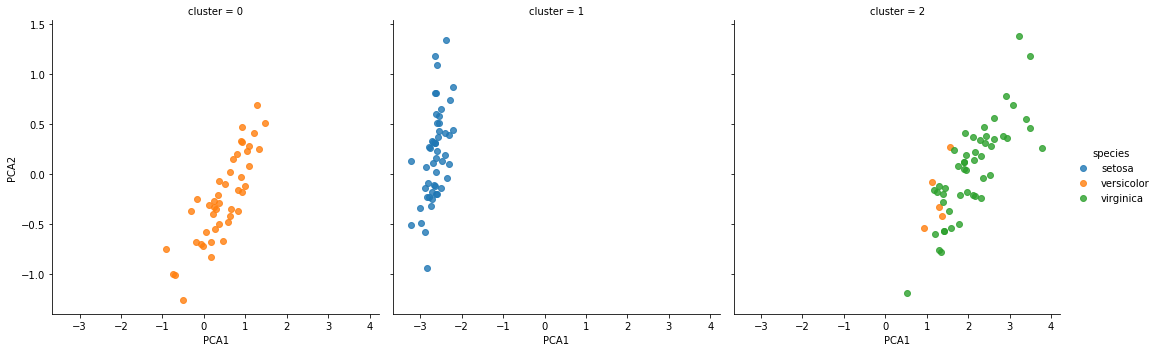

In [26]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

Al separar los datos por número de cluster, vemos exactamente cuán bien el algoritmo GMM ha recuperado la etiqueta subyacente: la especie *setosa* es separada perfectamente dentro del cluster 0, aunque vemos una pequeña porción mezclada entre *versicolor* y *virginica*. 

Esto significa que incluso sin un experto que nos diga las etiquetas de las flores individuales, las medidas de estas observaciones son lo suficientemente distintas para que podamos identificar *automáticamente* la prsencia de estos diferentes grupos de especies con un simple algoritmo de clustering. 

Este tipo de algoritmo podría incluso darle a los expertos en la disciplina algunas pistas sobre las relaciones entre las muestras que están observando (??).

## En resumen

En esta sección hemos cubierto las características esenciales de la representación de datos en Scikit-Learn y la API de estimadores. 

Sin importar el tipo de estimador, el mismo patrón de importar/instanciar/fittear/predecir se mantiene en todos los casos. 

Armado con esta nueva información sobre la API de estimadores, vos podés explorar la documentación de Scikit-Learn y comenzar a probar varios modelos sobre tus datos. 
